# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`This is how we write code`

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0-rc4


In [14]:
from sklearn.datasets import load_boston
data = load_boston()
type(data)
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [15]:
print(data.target)
print("============================================")
print(data.feature_names)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [0]:
X = data.data

In [0]:
y = data.target

In [0]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [0]:
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler 
scaleObj = StandardScaler()
X_train = scaleObj.fit_transform(X_train)
X_test = scaleObj.transform(X_test)


In [44]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1)
])


model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001, 0.99),
    loss = 'mse',
    metrics = ['mse']
)

# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler
def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * tf.math.exp(0.1 * (10 - epoch))


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
15/15 [==============================] - 0s 7ms/step - loss: 510.0952 - mse: 510.0952 - val_loss: 413.0599 - val_mse: 413.0599
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 222.0483 - mse: 222.0483 - val_loss: 129.0992 - val_mse: 129.0992
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 54.5804 - mse: 54.5804 - val_loss: 86.3348 - val_mse: 86.3348
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 165.5986 - mse: 165.5986 - val_loss: 282.5857 - val_mse: 282.5857
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 285.3600 - mse: 285.3600 - val_loss: 289.8980 - val_mse: 289.8980
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 222.2614 - mse: 222.2614 - val_loss: 141.5141 - val_mse: 141.5141
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 75.6925 - mse: 75.6925 - val_loss: 39.6144 - val_mse: 39.6144
Epoch 8/50
15/15 [========================

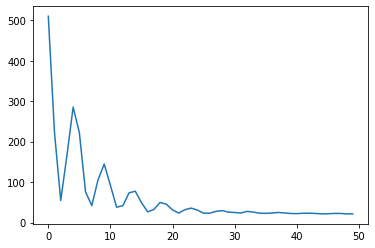

In [45]:
plt.plot(report.history['loss'], label="loss = SGD")

In [41]:
w = model.layers[0].get_weights()
print(w[0])

[[-0.8880968 ]
 [ 0.8578534 ]
 [ 0.10974638]
 [ 0.8998092 ]
 [-2.0369987 ]
 [ 3.0484173 ]
 [-0.35317865]
 [-3.1804998 ]
 [ 2.4824567 ]
 [-2.1088123 ]
 [-2.0630531 ]
 [ 0.71536857]
 [-3.5203145 ]]


In [29]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))

15/15 [==============================] - 0s 1ms/step - loss: 20.9179 - mse: 20.9179
Train eval:  [20.917936325073242, 20.917936325073242]
2/2 [==============================] - 0s 3ms/step - loss: 33.5199 - mse: 33.5199
Test eval:  [33.51986312866211, 33.51986312866211]
